In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## 데이터 로드
로컬 데이터 로드 후<br>
데이터를 확인한다.

In [4]:
file = "C:/Users/송이두/Desktop/가천대/2-1/인공지능개론/과제/data/abalone.csv"
data = pd.read_csv(file)

In [5]:
data.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


## 필요없는 컬럼 제거
id 컬럼의 경우 학습에 필요없으므로 제거한다.

In [7]:
dropped_data = data.drop("id", axis=1)

In [8]:
dropped_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 결측치 확인
isna로 결측치 있는지 확인(True or False) 후, sum()으로 True 값의 합을 반환한다.

In [9]:
dropped_data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

## 데이터 인코딩
문자형 컬럼의 경우 숫자형 데이터로 인코딩해준다.

In [10]:
dropped_data['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [11]:
label_encoder = LabelEncoder()
encoded_data = dropped_data.copy()
encoded_data['Sex'] = label_encoder.fit_transform(encoded_data['Sex'])

In [12]:
encoded_data['Sex'].value_counts()

Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64

## 상관 관계 행렬

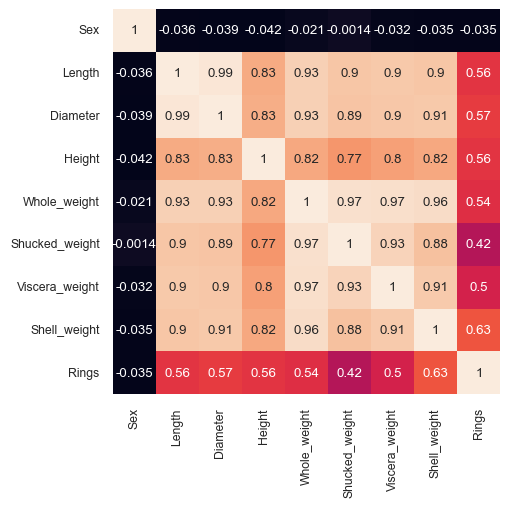

In [33]:
#결과에 가장 큰 영향을 미치는 특징을 확인하기 위해 상관 관계 행렬 출력
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

data_corr=encoded_data.corr()

plt.figure(figsize=(5,5))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

## 데이터 스케일링
모델이 학습하기 좋도록 데이터를 스케일링한다.

In [17]:
X = encoded_data.drop(['Rings'], axis=1)
y = encoded_data['Rings'].copy()

In [18]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [19]:
X[:5], scaled_X[:5]

(   Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
 0    2   0.455     0.365   0.095        0.5140          0.2245   
 1    2   0.350     0.265   0.090        0.2255          0.0995   
 2    0   0.530     0.420   0.135        0.6770          0.2565   
 3    2   0.440     0.365   0.125        0.5160          0.2155   
 4    1   0.330     0.255   0.080        0.2050          0.0895   
 
    Viscera_weight  Shell_weight  
 0          0.1010         0.150  
 1          0.0485         0.070  
 2          0.1415         0.210  
 3          0.1140         0.155  
 4          0.0395         0.055  ,
 array([[ 1.15198011, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
         -0.60768536, -0.72621157, -0.63821689],
        [ 1.15198011, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
         -1.17090984, -1.20522124, -1.21298732],
        [-1.28068972,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
         -0.4634999 , -0.35668983, -0.20713907],
        [ 1.1519

## 훈련 세트, 테스트 세트 분리
훈련 세트와 테스트 세트를 분리한다.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341,), (836,))

## Linear Regression

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

print('평균제곱근오차: ', mean_squared_error(lin_pred, y_test))

평균제곱근오차:  5.104186010193345


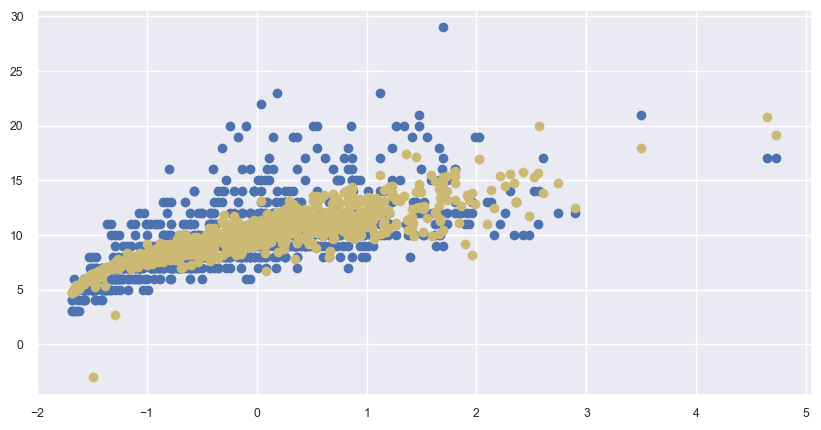

In [23]:
#scatter 시각화
plt.figure(figsize=(10,5))
plt.scatter(X_test[:, 7], y_test, label='y_test')
plt.scatter(X_test[:, 7], lin_pred, c='y', label='lin_preds')
plt.show()

## DT Regression

In [25]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)

print('평균제곱근오차: ', mean_squared_error(dt_pred, y_test))

평균제곱근오차:  8.995215311004785


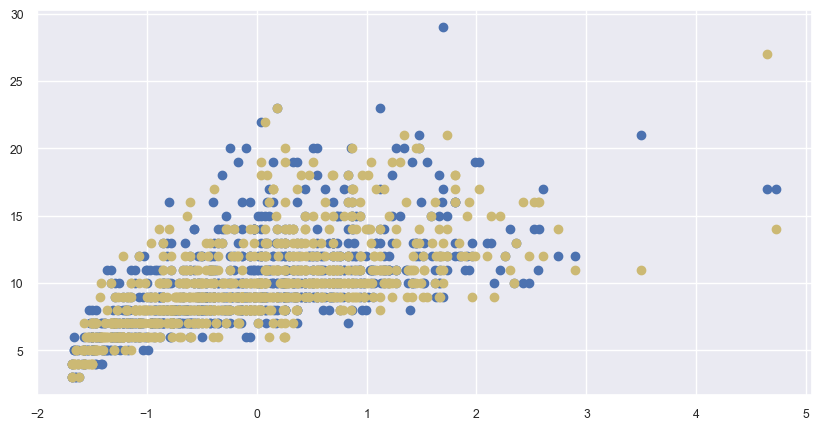

In [26]:
#scatter 시각화
plt.figure(figsize=(10,5))
plt.scatter(X_test[:, 7], y_test, label='y_test')
plt.scatter(X_test[:, 7], dt_pred, c='y', label='dt_preds')
plt.show()

## RF Regression

In [27]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

print('평균제곱근오차: ', mean_squared_error(rf_pred, y_test))

평균제곱근오차:  4.660450358851675


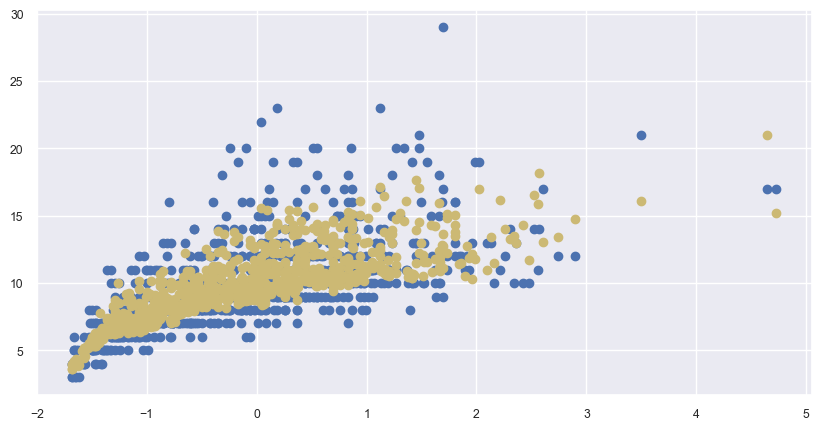

In [28]:
#scatter 시각화
plt.figure(figsize=(10,5))
plt.scatter(X_test[:, 7], y_test, label='y_test')
plt.scatter(X_test[:, 7], rf_pred, c='y', label='rf_preds')
plt.show()

## SVM Regression

In [30]:
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)
svm_pred = svm_reg.predict(X_test)

print('평균제곱근오차: ', mean_squared_error(svm_pred, y_test))

평균제곱근오차:  5.319447560614198


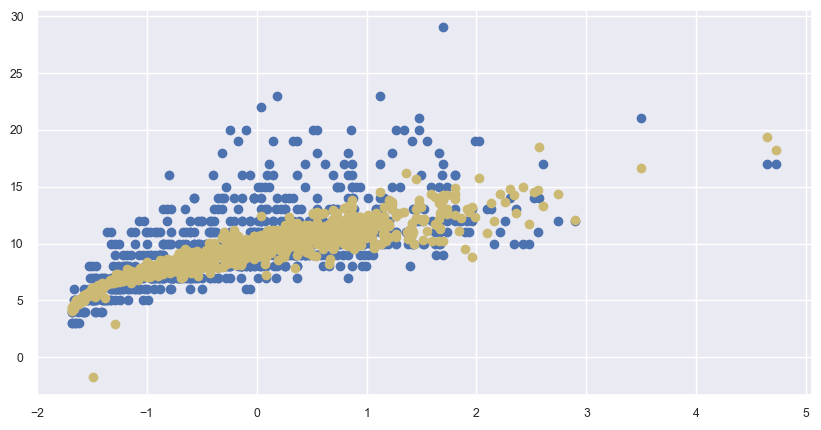

In [31]:
#scatter 시각화
plt.figure(figsize=(10,5))
plt.scatter(X_test[:, 7], y_test, label='y_test')
plt.scatter(X_test[:, 7], svm_pred, c='y', label='svm_preds')
plt.show()